In [1]:
import itertools
import os
import pickle

import ffsim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lucj_ffsim.lucj import LUCJTask

In [2]:
DATA_DIR = "data/lucj"
MOL_DATA_DIR = "data/molecular_data"

basis = "sto-6g"
ne, norb = 4, 4
molecule_basename = f"ethene_dissociation_{basis}_{ne}e{norb}o"

bond_distance_range = np.linspace(1.3, 4.0, 6)
connectivities = ["all-to-all", "square", "hex", "heavy-hex"]
n_reps_range = [2, 4, 6]
with_final_orbital_rotation_choices = [False]
param_initialization_methods = ["ccsd"]
optimization_methods = ["L-BFGS-B", "linear-method"]

tasks = [
    LUCJTask(
        molecule_basename=f"{molecule_basename}_bond_distance_{bond_distance:.5f}",
        connectivity=connectivity,
        n_reps=n_reps,
        with_final_orbital_rotation=with_final_orbital_rotation,
        param_initialization=param_initialization,
        optimization_method=optimization_method,
    )
    for connectivity, n_reps, with_final_orbital_rotation, param_initialization, optimization_method in itertools.product(
        connectivities,
        n_reps_range,
        with_final_orbital_rotation_choices,
        param_initialization_methods,
        optimization_methods,
    )
    for bond_distance in bond_distance_range
]

In [17]:
results = {}
infos = {}
mol_datas = {}
for task in tasks:
    result_filename = os.path.join(DATA_DIR, task.dirname, "result.pickle")
    with open(result_filename, "rb") as f:
        results[task] = pickle.load(f)
    info_filename = os.path.join(DATA_DIR, task.dirname, "info.pickle")
    with open(info_filename, "rb") as f:
        infos[task] = pickle.load(f)
    mol_filename = os.path.join(MOL_DATA_DIR, f"{task.molecule_basename}.pickle")
    with open(mol_filename, "rb") as f:
        mol_datas[task] = pickle.load(f)

Text(0.5, 1.0, 'Bond length 3.46, heavy-hex, L=2')

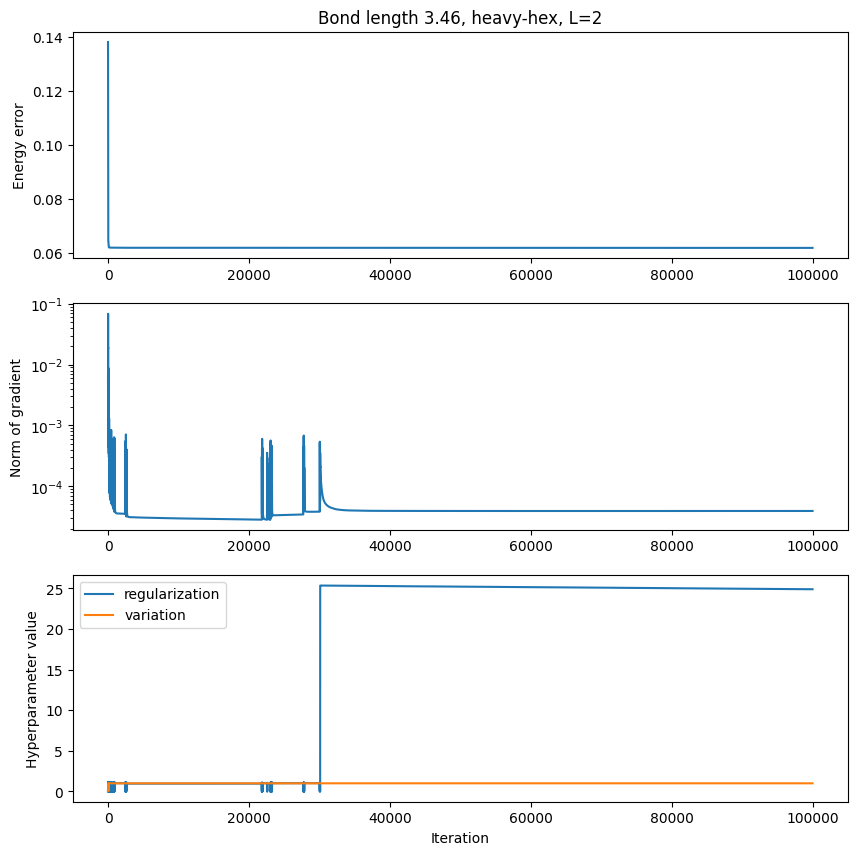

In [8]:
task = LUCJTask(
    molecule_basename="ethene_dissociation_sto-6g_4e4o_bond_distance_3.46000",
    connectivity="heavy-hex",
    n_reps=2,
    with_final_orbital_rotation=False,
    param_initialization="ccsd",
    optimization_method="linear-method",
)

result = results[task]
info = infos[task]
grad_norm = [np.linalg.norm(grad) for grad in info["jac"]]
errors = [fun - mol_datas[task].fci_energy for fun in info["fun"]]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

num = result.nit
ax1.plot(range(num), errors[:num])
ax1.set_ylabel("Energy error")

ax2.plot(range(num - 1), grad_norm[: num - 1])
ax2.set_ylabel("Norm of gradient")
ax2.set_yscale("log")

ax3.plot(range(num), info["regularization"][:num], label="regularization")
ax3.plot(range(num), info["variation"][:num], label="variation")
ax3.set_ylabel("Hyperparameter value")
ax3.set_xlabel("Iteration")
ax3.legend()

ax1.set_title(f"Bond length 3.46, {task.connectivity}, L={task.n_reps}")

Text(0.5, 1.0, 'Bond length 3.46, heavy-hex, L=2, L-BFGS-B')

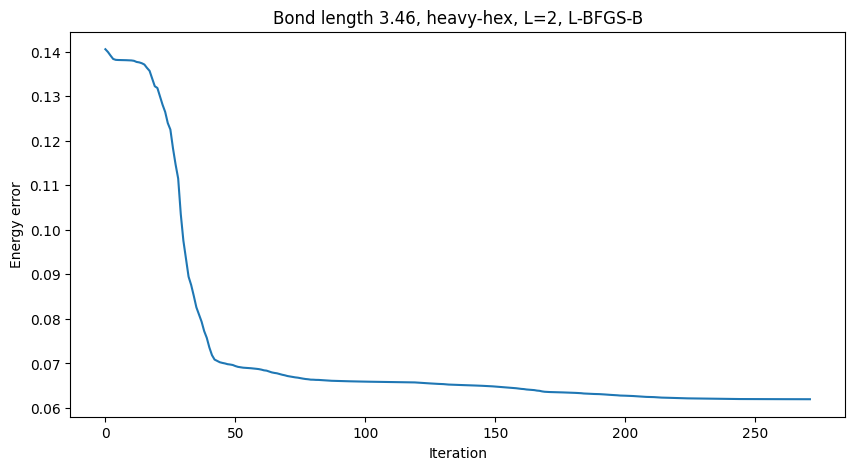

In [31]:
task = LUCJTask(
    molecule_basename="ethene_dissociation_sto-6g_4e4o_bond_distance_3.46000",
    connectivity="heavy-hex",
    n_reps=2,
    with_final_orbital_rotation=False,
    param_initialization="ccsd",
    optimization_method="L-BFGS-B",
)

result = results[task]
info = infos[task]
errors = [fun - mol_datas[task].fci_energy for fun in info["fun"]]

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

num = result.nit
ax1.plot(range(num), errors[:num])
ax1.set_ylabel("Energy error")
ax1.set_xlabel("Iteration")

ax1.set_title(f"Bond length 3.46, {task.connectivity}, L={task.n_reps}, L-BFGS-B")

Text(0.5, 1.0, 'Bond length 2.92, heavy-hex, L=2')

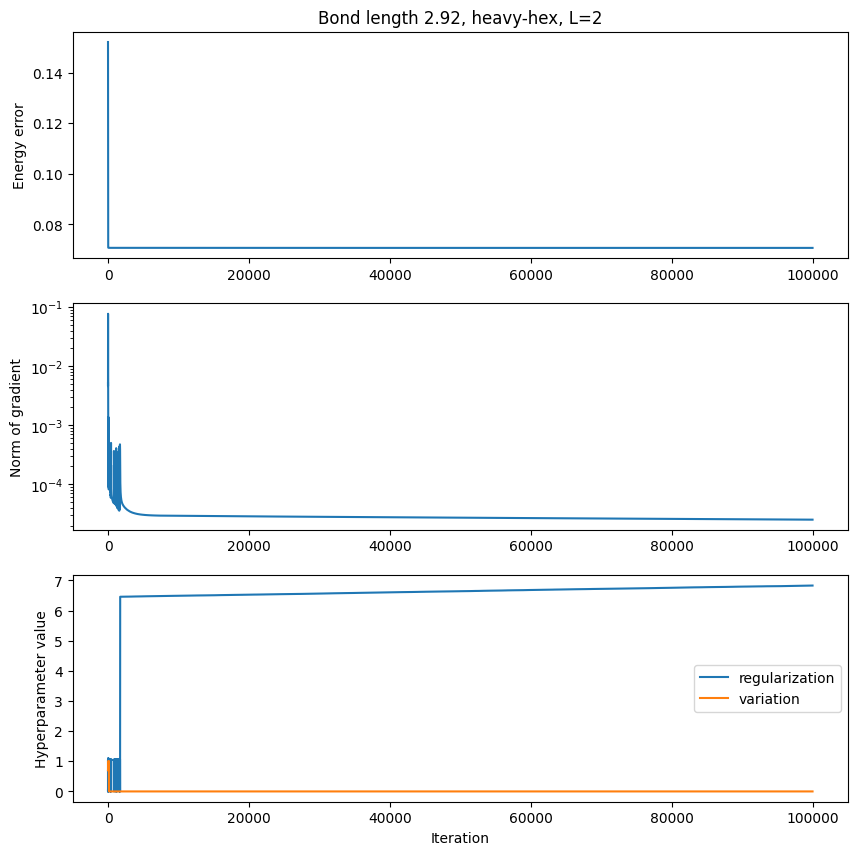

In [143]:
task = LUCJTask(
    molecule_basename="ethene_dissociation_sto-6g_4e4o_bond_distance_2.92000",
    connectivity="heavy-hex",
    n_reps=2,
    with_final_orbital_rotation=False,
    param_initialization="ccsd",
    optimization_method="linear-method",
)

result = results[task]
info = infos[task]
grad_norm = [np.linalg.norm(grad) for grad in info["jac"]]
errors = [fun - mol_datas[task].fci_energy for fun in info["fun"]]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

num = result.nit
ax1.plot(range(num), errors[:num])
ax1.set_ylabel("Energy error")

ax2.plot(range(num - 1), grad_norm[: num - 1])
ax2.set_ylabel("Norm of gradient")
ax2.set_yscale("log")

ax3.plot(range(num), info["regularization"][:num], label="regularization")
ax3.plot(range(num), info["variation"][:num], label="variation")
ax3.set_ylabel("Hyperparameter value")
ax3.set_xlabel("Iteration")
ax3.legend()

ax1.set_title(f"Bond length 2.92, {task.connectivity}, L={task.n_reps}")

Text(0.5, 1.0, 'Bond length 2.92, heavy-hex, L=2, L-BFGS-B')

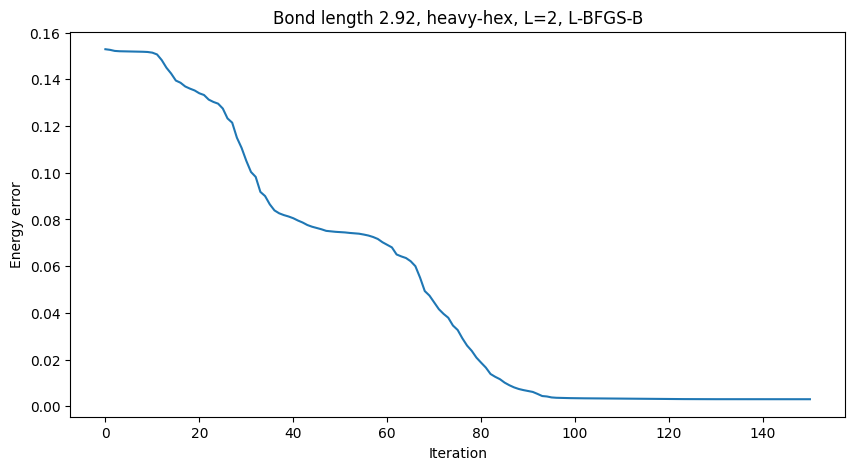

In [32]:
task = LUCJTask(
    molecule_basename="ethene_dissociation_sto-6g_4e4o_bond_distance_2.92000",
    connectivity="heavy-hex",
    n_reps=2,
    with_final_orbital_rotation=False,
    param_initialization="ccsd",
    optimization_method="L-BFGS-B",
)

result = results[task]
info = infos[task]
errors = [fun - mol_datas[task].fci_energy for fun in info["fun"]]

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))

num = result.nit
ax1.plot(range(num), errors[:num])
ax1.set_ylabel("Energy error")
ax1.set_xlabel("Iteration")

ax1.set_title(f"Bond length 2.92, {task.connectivity}, L={task.n_reps}, L-BFGS-B")

Text(0.5, 1.0, 'Bond length 4.0, hex, L=2')

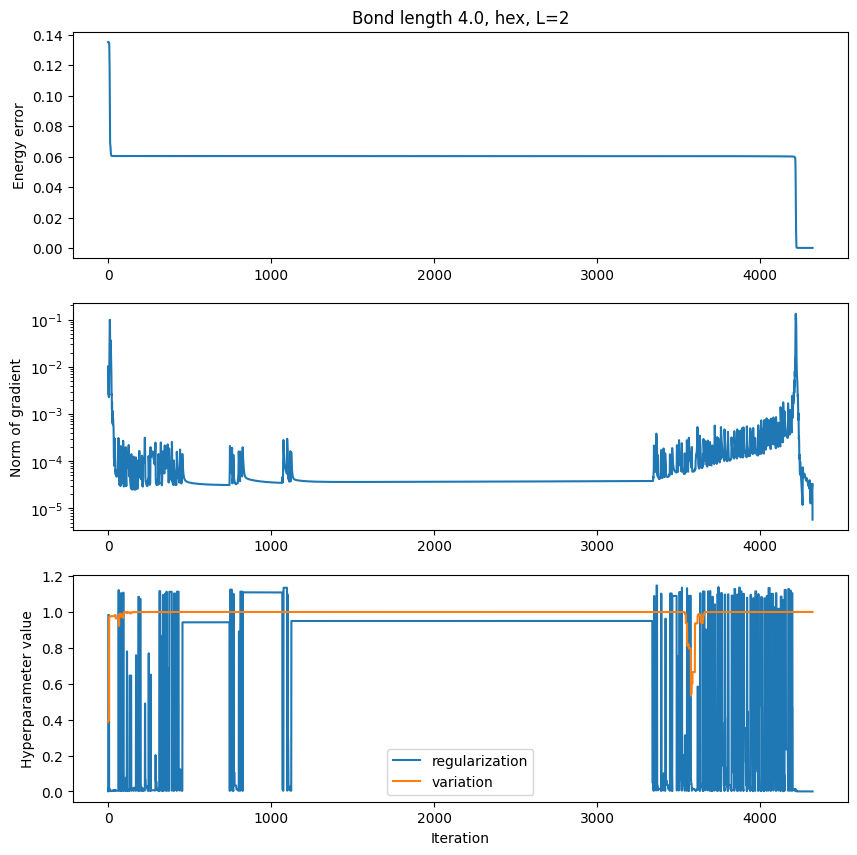

In [152]:
task = LUCJTask(
    molecule_basename="ethene_dissociation_sto-6g_4e4o_bond_distance_4.00000",
    connectivity="hex",
    n_reps=2,
    with_final_orbital_rotation=False,
    param_initialization="ccsd",
    optimization_method="linear-method",
)

result = results[task]
info = infos[task]
grad_norm = [np.linalg.norm(grad) for grad in info["jac"]]
errors = [fun - mol_datas[task].fci_energy for fun in info["fun"]]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

num = result.nit
ax1.plot(range(num), errors[:num])
ax1.set_ylabel("Energy error")

ax2.plot(range(num), grad_norm[:num])
ax2.set_ylabel("Norm of gradient")
ax2.set_yscale("log")

ax3.plot(range(num), info["regularization"][:num], label="regularization")
ax3.plot(range(num), info["variation"][:num], label="variation")
ax3.set_ylabel("Hyperparameter value")
ax3.set_xlabel("Iteration")
ax3.legend()

ax1.set_title(f"Bond length 4.0, {task.connectivity}, L={task.n_reps}")

Text(0.5, 1.0, 'Bond length 1.3, heavy-hex, L=2')

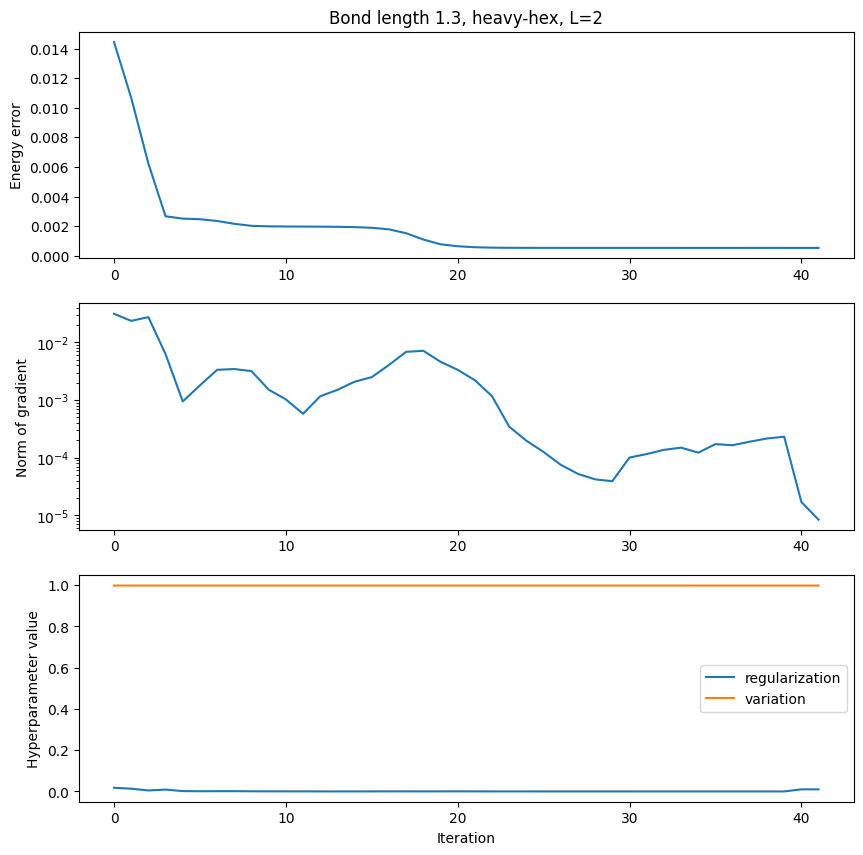

In [154]:
task = LUCJTask(
    molecule_basename="ethene_dissociation_sto-6g_4e4o_bond_distance_1.30000",
    connectivity="heavy-hex",
    n_reps=2,
    with_final_orbital_rotation=False,
    param_initialization="ccsd",
    optimization_method="linear-method",
)

result = results[task]
info = infos[task]
grad_norm = [np.linalg.norm(grad) for grad in info["jac"]]
errors = [fun - mol_datas[task].fci_energy for fun in info["fun"]]

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

num = result.nit
ax1.plot(range(num), errors[:num])
ax1.set_ylabel("Energy error")

ax2.plot(range(num), grad_norm[:num])
ax2.set_ylabel("Norm of gradient")
ax2.set_yscale("log")

ax3.plot(range(num), info["regularization"][:num], label="regularization")
ax3.plot(range(num), info["variation"][:num], label="variation")
ax3.set_ylabel("Hyperparameter value")
ax3.set_xlabel("Iteration")
ax3.legend()

ax1.set_title(f"Bond length 1.3, {task.connectivity}, L={task.n_reps}")